In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
hdata = pd.read_csv("./house_data/kc_house_data.csv")

In [3]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
hdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
hdata.shape

(21613, 21)

In [6]:
hdata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

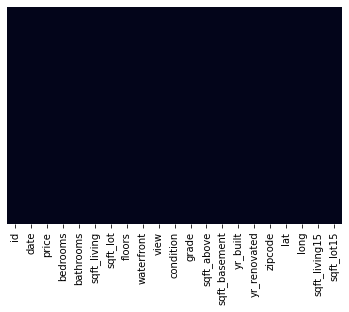

In [43]:
sns.heatmap(hdata.isnull(),yticklabels=False,cbar=False)

In [7]:
hdata['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [8]:
hdata['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [9]:
hdata['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [10]:
hdata['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

/home/student/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

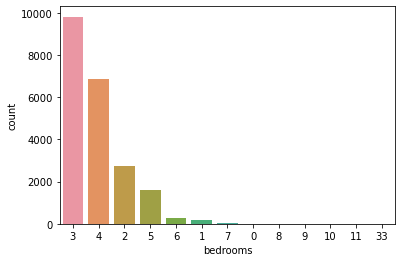

In [11]:
sns.countplot(hdata.bedrooms, order = hdata['bedrooms'].value_counts().index)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'price vs sqft_above'}, xlabel='sqft_above', ylabel='price'>

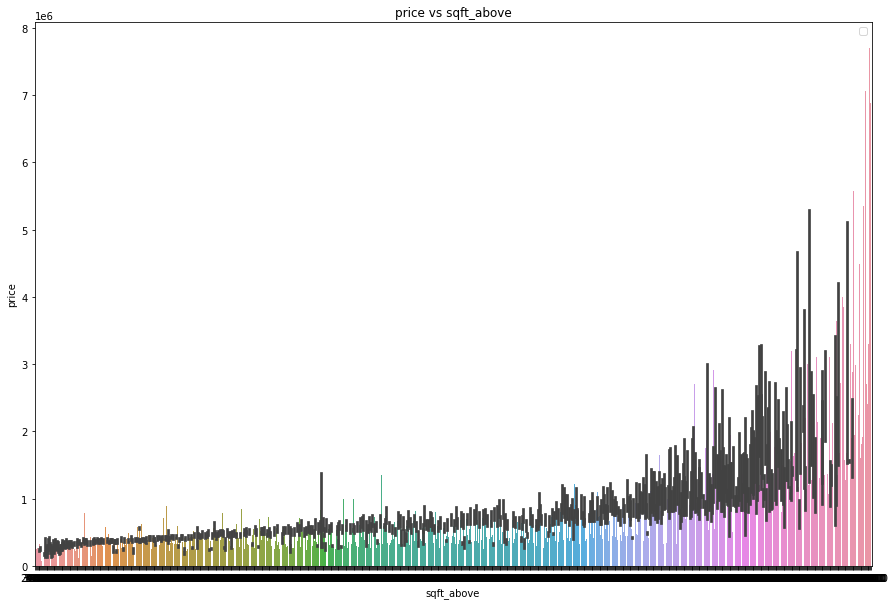

In [12]:
# barplot for analysing how the price is changing with the squareft(above)
fig,axes= plt.subplots(nrows =1, ncols=1,figsize =(15,10))
plt.title("price vs sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.legend()
sns.barplot(x='sqft_above', y='price',data = hdata)

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <BarContainer object of 5 artists>)

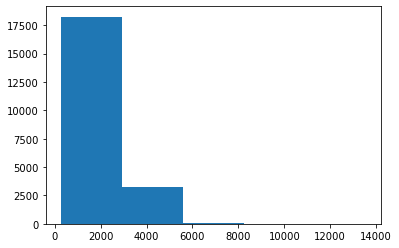

In [13]:
plt.hist('sqft_living' , data = hdata , bins = 5)
# view the data in range

/home/student/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

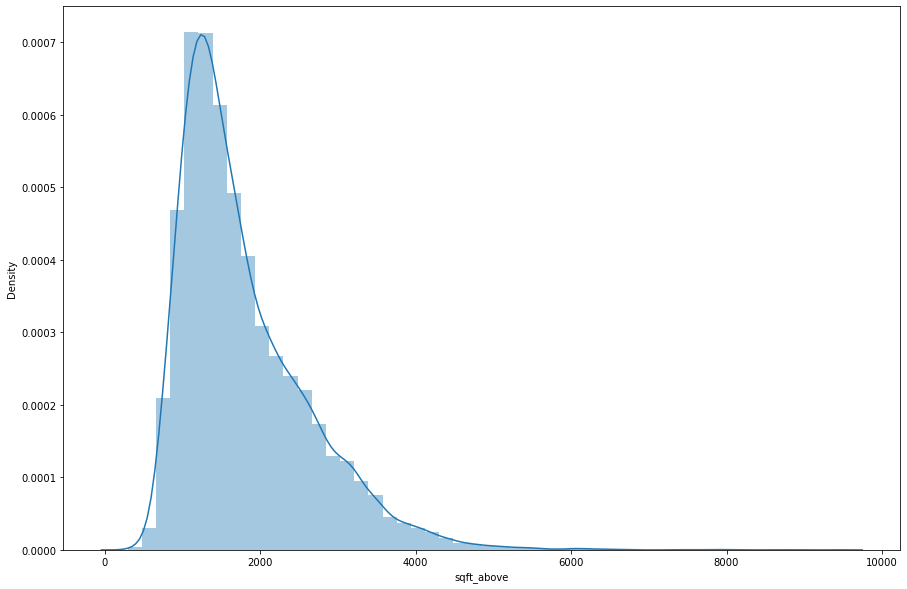

In [14]:
# dist plot for (sqft_above)viewing data is skewed or not (it is not like the normal distribution it is either shift left or right of the central distribution point)
fig , axes = plt.subplots(nrows = 1 , ncols = 1, figsize =( 15, 10))
sns.distplot( hdata['sqft_above'], hist = True , kde =True, rug = False , label = 'sqft above', norm_hist =True)

/home/student/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

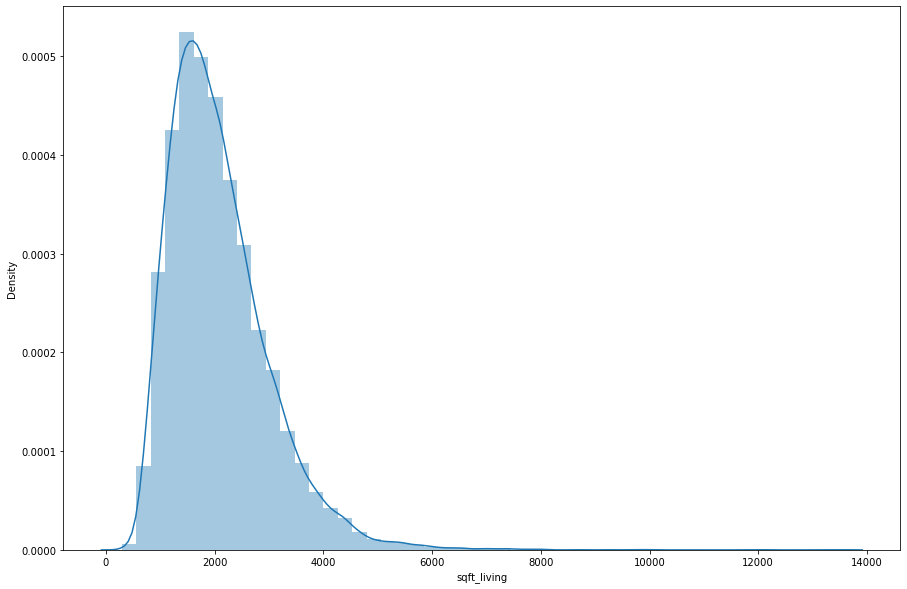

In [15]:
# similarly the dist plot for the sqft_living to see if the data is skewed of not
fig , axes = plt.subplots(nrows =1 , ncols =1 , figsize=(15,10))
sns.distplot(hdata['sqft_living'], hist = True, kde = True , rug = False, label = 'sqft living', norm_hist = True)

In [16]:
print('Sqft Living:--')
print('Mean',hdata['sqft_living'].mean())
print('Median',hdata['sqft_living'].median())
print('Mode',hdata['sqft_living'].mode()[0])

Sqft Living:--
Mean 2079.8997362698374
Median 1910.0
Mode 1300


In [17]:
print('Sqft above:--')
print('Mean',hdata['sqft_above'].mean())
print('Median',hdata['sqft_above'].median())
print('Mode',hdata['sqft_above'].mode()[0])

Sqft above:--
Mean 1788.396094581463
Median 1560.0
Mode 1300.0


In [18]:
# as we can see in the graph that sqft_living has highest value at 1300 
len(hdata[hdata['sqft_living']==1300])

138

In [40]:
hdata['sqft_above']=hdata['sqft_above'].fillna(hdata['sqft_above'].median())

In [41]:
hdata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

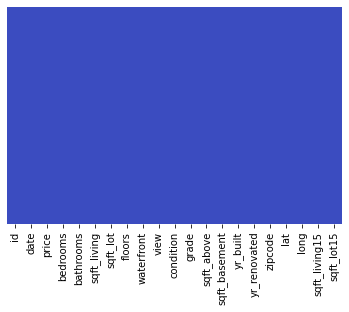

In [42]:
sns.heatmap(hdata.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

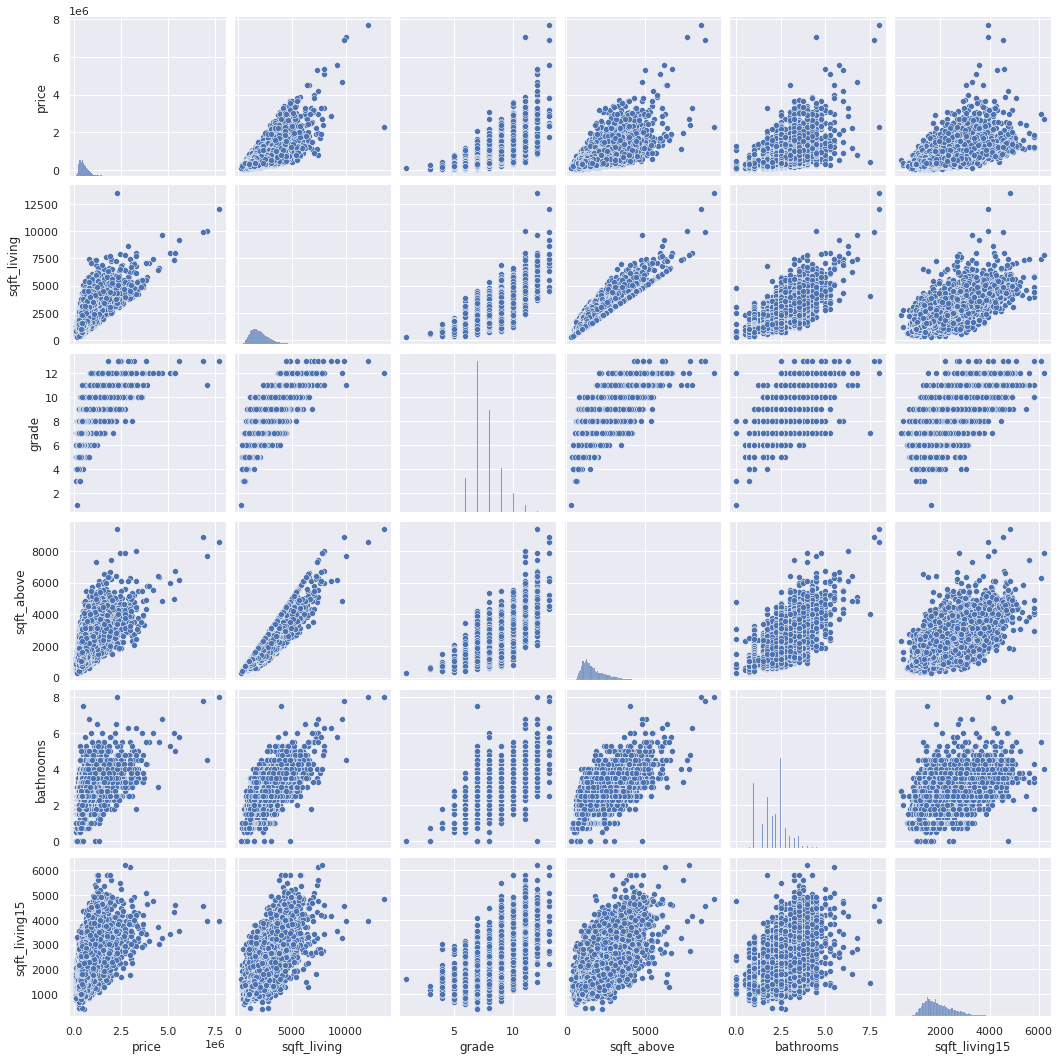

In [46]:
sns.set()
cols = hdata[['price','sqft_living','grade','sqft_above','bathrooms','sqft_living15']]
sns.pairplot(cols, height = 2.5)

removing skewness

In [56]:
print('The skewness of the variable sqft_living is',hdata['sqft_living'].skew())
print('The skewness of the variable sqft_above is',hdata['sqft_above'].skew())

The skewness of the variable sqft_living is 1.471555426802092
The skewness of the variable sqft_above is 1.446710715799763


# test train and split

In [23]:
X=hdata[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15']]


In [24]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,1410,1287


In [25]:
y = hdata['price']

In [26]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [29]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
19642,4,2.50,2070,4270,2.0,0,0,3,8,2070.0,0,2070,4610
8626,3,2.25,1400,6970,2.0,0,0,3,8,1400.0,0,1800,8140
6954,5,3.00,2190,4900,2.0,0,0,5,7,1490.0,700,1370,4606
20242,4,2.50,2547,4800,2.0,0,0,3,9,2547.0,0,2598,4800
10376,5,3.50,4060,8309,2.0,0,0,3,9,2960.0,1100,1730,11711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3,2.25,1920,9672,2.0,0,0,4,8,1920.0,0,1950,10125
8006,3,1.00,1240,3600,1.5,0,0,3,7,1240.0,0,1680,3600
17745,3,2.25,1780,7332,2.0,0,0,3,7,1780.0,0,1510,7625
17931,2,1.00,1150,5000,1.0,0,0,4,7,1050.0,100,1463,4320


In [30]:
y_train

19642    493000.0
8626     425000.0
6954     588000.0
20242    392440.0
10376    630000.0
           ...   
5695     625000.0
8006     390000.0
17745    272450.0
17931    552000.0
13151    394000.0
Name: price, Length: 16209, dtype: float64

In [31]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00,1050,6317,1.5,0,0,4,7,1050.0,0,1600,9616
1348,4,2.25,2040,9565,1.0,0,0,3,8,1400.0,640,1890,8580
20366,4,2.50,2500,4000,2.0,0,0,3,8,2500.0,0,1480,4300
16617,5,2.00,2360,19899,1.0,0,0,4,7,2360.0,0,1860,19998
20925,3,3.00,1670,4440,1.0,0,0,3,7,1670.0,0,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,3,1.75,1520,5500,1.5,0,0,5,7,1520.0,0,2310,5500
2747,5,3.00,2970,10335,2.0,0,0,3,9,2970.0,0,2970,10335
15565,3,2.50,3440,103672,2.0,0,0,3,9,3440.0,0,2710,112820
21238,3,2.50,1572,4000,2.0,0,0,3,8,1572.0,0,1608,5175


In [32]:
y_test

3834     349950.0
1348     450000.0
20366    635000.0
16617    355500.0
20925    246950.0
           ...   
7148     738000.0
2747     726000.0
15565    560000.0
21238    299000.0
2333     555000.0
Name: price, Length: 5404, dtype: float64

In [33]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [34]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [35]:
X_train_std

array([[ 0.69608634,  0.49894508, -0.00810266, ..., -0.65896096,
         0.12372791, -0.29371924],
       [-0.40802008,  0.173745  , -0.74457445, ..., -0.65896096,
        -0.27289927, -0.16524962],
       [ 1.80019275,  1.14934525,  0.12380274, ...,  0.93301185,
        -0.90456477, -0.29386481],
       ...,
       [-0.40802008,  0.173745  , -0.32687403, ..., -0.65896096,
        -0.69890623, -0.18399236],
       [-1.51212649, -1.45225542, -1.01937736, ..., -0.43153627,
        -0.76794874, -0.3042734 ],
       [-0.40802008, -1.45225542, -0.68961387, ...,  0.0233131 ,
        -1.38933131, -0.17980708]])

In [49]:
X_test_std

array([[-1.51212649, -1.45225542, -1.12929852, ..., -0.65896096,
        -0.56669717, -0.11153258],
       [ 0.69608634,  0.173745  , -0.04107901, ...,  0.79655703,
        -0.14069021, -0.14923641],
       [ 0.69608634,  0.49894508,  0.46455834, ..., -0.65896096,
        -0.74297592, -0.30500127],
       ...,
       [-0.40802008,  0.49894508,  1.49781727, ..., -0.65896096,
         1.06388121,  3.64443868],
       [-0.40802008,  0.49894508, -0.55551005, ..., -0.65896096,
        -0.55494526, -0.27315682],
       [-0.40802008,  1.14934525,  0.92622723, ...,  2.47949972,
         0.41752581,  0.20014272]])

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(hdata.corr(),annot = True, linewidth=.5)
#corellation between attributes and pricing

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [38]:
lr.fit(X_train_std,y_train)

LinearRegression()

In [50]:
y_pred=lr.predict(X_test_std)

In [51]:
y_pred

array([356775.41470563, 511959.24452744, 573741.11102649, ...,
       824137.69522461, 436993.18859111, 732028.01466528])

In [52]:
y_test

3834     349950.0
1348     450000.0
20366    635000.0
16617    355500.0
20925    246950.0
           ...   
7148     738000.0
2747     726000.0
15565    560000.0
21238    299000.0
2333     555000.0
Name: price, Length: 5404, dtype: float64

In [53]:
from sklearn.metrics import mean_absolute_error,r2_score

In [54]:
mean_absolute_error(y_test,y_pred)

151502.61205740733

In [55]:
r2_score(y_test,y_pred)

0.6211689993022458